<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Final_BTM_110Topic_Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor

In [2]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 84.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 21.1 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=2d11e4d2f9116ba71fb230ea09d8ad62c803dc2bb49bdef677465bbf652be276
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
data_tweet= pd.read_csv("/content/Updated_Final_Clean_Prediatric_tweets27feb 1.csv")
data_tweet

,tweet_id,text,author_id,created_at,clean_text
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15T06:00:31+00:00,latest data on covid19 vaccination coverage in...
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15T05:55:10+00:00,never heard that. have a customer whose mother...
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15T05:51:29+00:00,pertussis immunity also wanes and adults are r...
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15T05:49:40+00:00,yep. and that is if you even need a doctor for...
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15T05:48:25+00:00,"tetanus vac, has one of higher/ highest rates ..."
...,...,...,...,...,...
33444,1753995316699832325,Tetanus spores are found everywhere in the env...,391403694,2024-02-04T04:14:05+00:00,tetanus spores are found everywhere in the env...
33445,1753995143177519393,"@ali_jadoon93 Well defined. \nAdditionally, we...",442394797,2024-02-04T04:13:24+00:00,"well defined. additionally, we vaccinate the p..."
33446,1753995025963253897,@songmuddywater @ScholerinED Rusted metal isn'...,195483947,2024-02-04T04:12:56+00:00,rusted metal isn't metal alone... it's usually...
33447,1753994405604626618,Donations are DOUBLED w/code BIRTHDAY today! 🥳...,1149708999060860931,2024-02-04T04:10:28+00:00,donations are doubled w/code birthday today! $...


In [ ]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,tweet_id,text,author_id,created_at,clean_text,date,time,day_of_week
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15 06:00:31+00:00,latest data on covid19 vaccination coverage in...,2024-02-15,06:00:31,Thursday
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15 05:55:10+00:00,never heard that. have a customer whose mother...,2024-02-15,05:55:10,Thursday
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15 05:51:29+00:00,pertussis immunity also wanes and adults are r...,2024-02-15,05:51:29,Thursday
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15 05:49:40+00:00,yep. and that is if you even need a doctor for...,2024-02-15,05:49:40,Thursday
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15 05:48:25+00:00,"tetanus vac, has one of higher/ highest rates ...",2024-02-15,05:48:25,Thursday
...,...,...,...,...,...,...,...,...
33444,1753995316699832325,Tetanus spores are found everywhere in the env...,391403694,2024-02-04 04:14:05+00:00,tetanus spores are found everywhere in the env...,2024-02-04,04:14:05,Sunday
33445,1753995143177519393,"@ali_jadoon93 Well defined. \nAdditionally, we...",442394797,2024-02-04 04:13:24+00:00,"well defined. additionally, we vaccinate the p...",2024-02-04,04:13:24,Sunday
33446,1753995025963253897,@songmuddywater @ScholerinED Rusted metal isn'...,195483947,2024-02-04 04:12:56+00:00,rusted metal isn't metal alone... it's usually...,2024-02-04,04:12:56,Sunday
33447,1753994405604626618,Donations are DOUBLED w/code BIRTHDAY today! 🥳...,1149708999060860931,2024-02-04 04:10:28+00:00,donations are doubled w/code birthday today! 🥳...,2024-02-04,04:10:28,Sunday


In [ ]:
timestamp=data_tweet.created_at.tolist()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [ ]:
data_tweet

,tweet_id,text,author_id,created_at,clean_text,date,time,day_of_week
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15 06:00:31+00:00,latest data covid19 vaccination coverage eu/ee...,2024-02-15,06:00:31,Thursday
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15 05:55:10+00:00,never heard . customer whose mother died tetan...,2024-02-15,05:55:10,Thursday
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15 05:51:29+00:00,pertussis immunity also wanes adults recommend...,2024-02-15,05:51:29,Thursday
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15 05:49:40+00:00,"yep . even need doctor , cases ’ . fear monger...",2024-02-15,05:49:40,Thursday
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15 05:48:25+00:00,"tetanus vac , one higher/ highest rates seriou...",2024-02-15,05:48:25,Thursday
...,...,...,...,...,...,...,...,...
33444,1753995316699832325,Tetanus spores are found everywhere in the env...,391403694,2024-02-04 04:14:05+00:00,tetanus spores found everywhere environment .,2024-02-04,04:14:05,Sunday
33445,1753995143177519393,"@ali_jadoon93 Well defined. \nAdditionally, we...",442394797,2024-02-04 04:13:24+00:00,"well defined . additionally , vaccinate pregna...",2024-02-04,04:13:24,Sunday
33446,1753995025963253897,@songmuddywater @ScholerinED Rusted metal isn'...,195483947,2024-02-04 04:12:56+00:00,rusted metal n't metal alone ... 's usually da...,2024-02-04,04:12:56,Sunday
33447,1753994405604626618,Donations are DOUBLED w/code BIRTHDAY today! 🥳...,1149708999060860931,2024-02-04 04:10:28+00:00,donations doubled w/code birthday today ! 🥳 $ ...,2024-02-04,04:10:28,Sunday


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [ ]:
data_tweet

,tweet_id,text,author_id,created_at,clean_text,date,time,day_of_week,new_lemma_text
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15 06:00:31+00:00,latest data covid19 vaccination coverage eu/ee...,2024-02-15,06:00:31,Thursday,latest data covid19 vaccination coverage eu/ee...
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15 05:55:10+00:00,never heard . customer whose mother died tetan...,2024-02-15,05:55:10,Thursday,never heard . customer whose mother died tetan...
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15 05:51:29+00:00,pertussis immunity also wanes adults recommend...,2024-02-15,05:51:29,Thursday,pertussis immunity also wane adult recommended...
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15 05:49:40+00:00,"yep . even need doctor , cases ’ . fear monger...",2024-02-15,05:49:40,Thursday,"yep . even need doctor , case ’ . fear mongeri..."
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15 05:48:25+00:00,"tetanus vac , one higher/ highest rates seriou...",2024-02-15,05:48:25,Thursday,"tetanus vac , one higher/ highest rate serious..."
...,...,...,...,...,...,...,...,...,...
33444,1753995316699832325,Tetanus spores are found everywhere in the env...,391403694,2024-02-04 04:14:05+00:00,tetanus spores found everywhere environment .,2024-02-04,04:14:05,Sunday,tetanus spore found everywhere environment .
33445,1753995143177519393,"@ali_jadoon93 Well defined. \nAdditionally, we...",442394797,2024-02-04 04:13:24+00:00,"well defined . additionally , vaccinate pregna...",2024-02-04,04:13:24,Sunday,"well defined . additionally , vaccinate pregna..."
33446,1753995025963253897,@songmuddywater @ScholerinED Rusted metal isn'...,195483947,2024-02-04 04:12:56+00:00,rusted metal n't metal alone ... 's usually da...,2024-02-04,04:12:56,Sunday,rusted metal n't metal alone ... 's usually da...
33447,1753994405604626618,Donations are DOUBLED w/code BIRTHDAY today! 🥳...,1149708999060860931,2024-02-04 04:10:28+00:00,donations doubled w/code birthday today ! 🥳 $ ...,2024-02-04,04:10:28,Sunday,donation doubled w/code birthday today ! 🥳 $ 1...


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 9.5 MB/s eta 0:00:00


In [ ]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [ ]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
ctfidf_model = ClassTfidfTransformer()


In [ ]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 110,
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [ ]:
import time

In [ ]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [ ]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-02-27 08:23:09,438 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1046 [00:00<?, ?it/s]

2024-02-27 08:23:27,727 - BERTopic - Embedding - Completed ✓
2024-02-27 08:23:27,730 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-27 08:24:12,117 - BERTopic - Dimensionality - Completed ✓
2024-02-27 08:24:12,119 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-27 08:30:34,964 - BERTopic - Cluster - Completed ✓
2024-02-27 08:30:34,967 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-27 08:30:46,545 - BERTopic - Representation - Completed ✓
2024-02-27 08:30:46,547 - BERTopic - Topic reduction - Reducing number of topics
2024-02-27 08:30:50,190 - BERTopic - Topic reduction - Reduced number of topics from 399 to 110


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12665,-1_vaccination_vaccine_vaccinate_measles,"[vaccination, vaccine, vaccinate, measles, cov...","[, kid like 4 month old decided vaccinate anym..."
1,0,5240,0_covid_sids_vaccinate_vaccination,"[covid, sids, vaccinate, vaccination, vaccine,...","[please n't vaccinate baby . ‍, vaccinate chil..."
2,1,1686,1_measles_mmr_practice_catching,"[measles, mmr, practice, catching, outbreak, u...",[3 million unvaccinated child risk catching me...
3,2,1471,2_tetanus_shot_rusty_nail,"[tetanus, shot, rusty, nail, hope, metal, inje...","[get tetanus shot ?, give tetanus shot ?, teta..."
4,3,602,3_autism_amish_asthma_allergy,"[autism, amish, asthma, allergy, vaccination, ...",[’ vaccinate child much autism ’ exist . clear...
...,...,...,...,...,...
105,104,16,104_grandpa_uncle_diphtheria_died,"[grandpa, uncle, diphtheria, died, grandma, 19...","[1926 , corner fruit store grandparent , fathe..."
106,105,16,105_vial_deliver_safely_unrwa,"[vial, deliver, safely, unrwa, unicef, gaza, r...","[3h yesterday , ( unrwa , unicef , , delivered..."
107,106,15,106_event_covidvaccine_calendar_carevan,"[event, covidvaccine, calendar, carevan, visit...",[tomorrow ’ ( 2/14 ) care van vaccination even...
108,107,15,107_miscarriage_damaged_luck_stillbirth,"[miscarriage, damaged, luck, stillbirth, pray,...",[maybe want healthy child without damaged dna ...


In [ ]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.670709641327593


In [ ]:
# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()

In [ ]:
topic_info.to_csv('topic_info_Pediatric_110topic.csv', index = False)

## **FINAL TWEETS BY TOPIC**

In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import xlsxwriter
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('tweets_by_topics_110.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(100):  # Assuming you have 100 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.loc[topic_indices, ['tweet_id', 'text']]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('tweets_by_topics_110.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 100,Topic # 101,Topic # 102,Topic # 103,Topic # 104,Topic # 105,Topic # 106,Topic # 107,Topic # 108,Topic # 109
0,covid,measles,tetanus,autism,rsv,school,pregnancy,tetanus,clinic,flu,...,newsroom,vxn,adhd,vaed,entrusting,grandpa,vial,event,miscarriage,ispa
1,sids,mmr,shot,amish,pfizer,exemption,sars,vaccine,appointment,influenza,...,breaking,cvd,hyperactivity,implicate,elternhospi,uncle,deliver,covidvaccine,damaged,urgency
2,vaccinate,practice,rusty,asthma,preterm,ontario,cov,antibody,flu,nivw,...,expose,prioritize,thimerosal,naomi,souvenir,diphtheria,safely,calendar,luck,meningococcal
3,vaccination,catching,nail,allergy,failed,public,covid,flu,centre,fightflu,...,news,release,deficit,delta,congratulation,died,unrwa,carevan,stillbirth,recommends
4,vaccine,outbreak,hope,vaccination,birth,state,neonatal,booster,held,nasal,...,stierven,agenda,ritalin,300,immunization,grandma,unicef,visit,pray,whooping
5,pediatric,unvaccinated,metal,vaccine,neonatal,suspension,maternal,polio,surgery,spray,...,prik,trust,prescribing,dr,birth,1926,gaza,englewood,dna,mumps
6,risk,vaccination,injection,childhood,pregnant,requirement,flu,pox,monday,cps,...,island,public,hepatitis,pregnant,victoriassmilefoundation,aunt,rubella,cottage,multiple,hpv
7,vaccinated,appointment,stitch,issue,vaccine,vaccination,jama,immunity,covid19,sick,...,door,pediatric,asthma,disease,ourvsfbabies,gerrard,measles,pediatric,midwife,immunization
8,health,nh,wound,increase,cdc,attending,risk,vaccinated,st,winter,...,note,health,pediatric,covid,immunizationmilestones,cousin,600k,st,gelatin,measles
9,pregnant,vaccinated,stepped,believe,syncytial,enroll,infection,jab,gp,hospitalization,...,community,lie,druggies,vaccine,celebration,grandmother,vaccination,accepted,birth,covid


In [ ]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 100,Topic # 101,Topic # 102,Topic # 103,Topic # 104,Topic # 105,Topic # 106,Topic # 107,Topic # 108,Topic # 109
0,covid,measles,tetanus,autism,rsv,school,pregnancy,tetanus,clinic,flu,...,newsroom,vxn,adhd,vaed,entrusting,grandpa,vial,event,miscarriage,ispa
1,sids,mmr,shot,amish,pfizer,exemption,sars,vaccine,appointment,influenza,...,breaking,cvd,hyperactivity,implicate,elternhospi,uncle,deliver,covidvaccine,damaged,urgency
2,vaccinate,practice,rusty,asthma,preterm,ontario,cov,antibody,flu,nivw,...,expose,prioritize,thimerosal,naomi,souvenir,diphtheria,safely,calendar,luck,meningococcal
3,vaccination,catching,nail,allergy,failed,public,covid,flu,centre,fightflu,...,news,release,deficit,delta,congratulation,died,unrwa,carevan,stillbirth,recommends
4,vaccine,outbreak,hope,vaccination,birth,state,neonatal,booster,held,nasal,...,stierven,agenda,ritalin,300,immunization,grandma,unicef,visit,pray,whooping
5,pediatric,unvaccinated,metal,vaccine,neonatal,suspension,maternal,polio,surgery,spray,...,prik,trust,prescribing,dr,birth,1926,gaza,englewood,dna,mumps
6,risk,vaccination,injection,childhood,pregnant,requirement,flu,pox,monday,cps,...,island,public,hepatitis,pregnant,victoriassmilefoundation,aunt,rubella,cottage,multiple,hpv
7,vaccinated,appointment,stitch,issue,vaccine,vaccination,jama,immunity,covid19,sick,...,door,pediatric,asthma,disease,ourvsfbabies,gerrard,measles,pediatric,midwife,immunization
8,health,nh,wound,increase,cdc,attending,risk,vaccinated,st,winter,...,note,health,pediatric,covid,immunizationmilestones,cousin,600k,st,gelatin,measles
9,pregnant,vaccinated,stepped,believe,syncytial,enroll,infection,jab,gp,hospitalization,...,community,lie,druggies,vaccine,celebration,grandmother,vaccination,accepted,birth,covid


In [ ]:
topics_list.to_csv("Final_Topics_list.csv", index = False)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

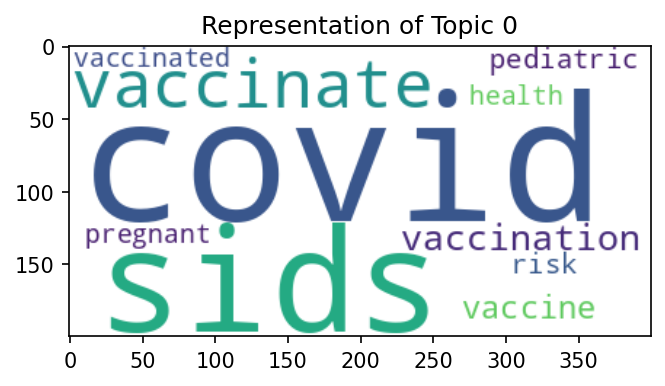

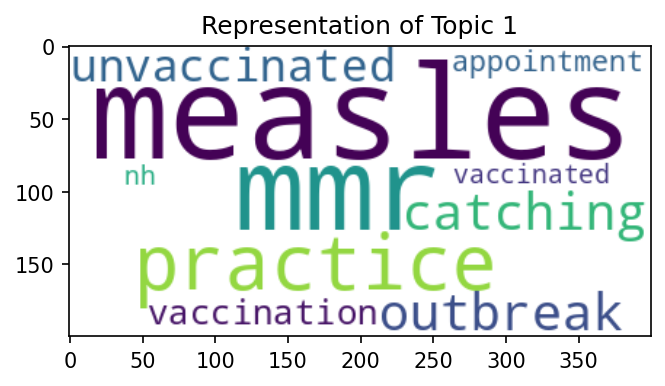

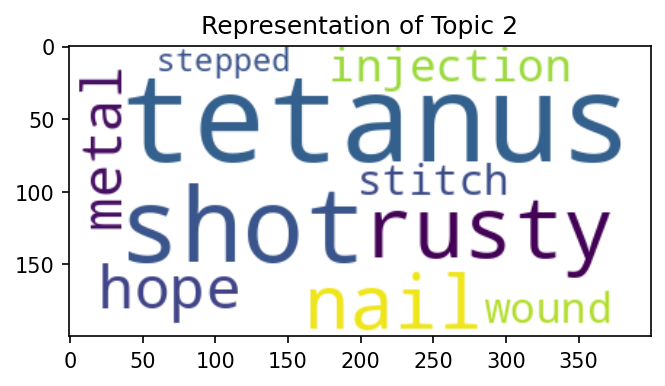

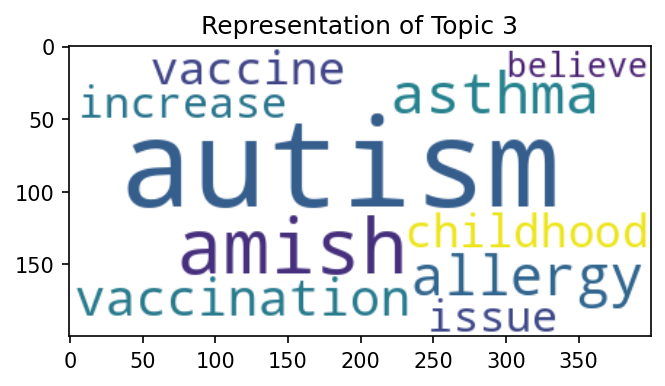

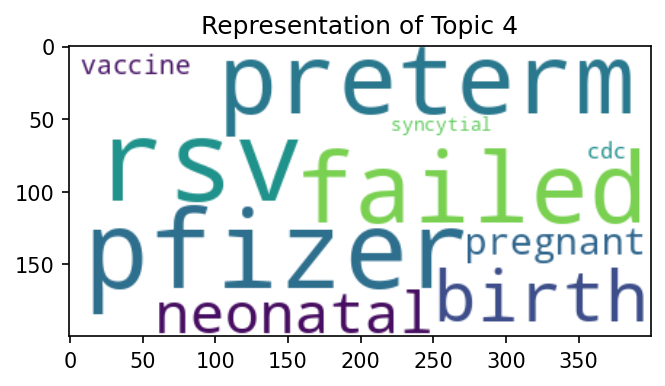

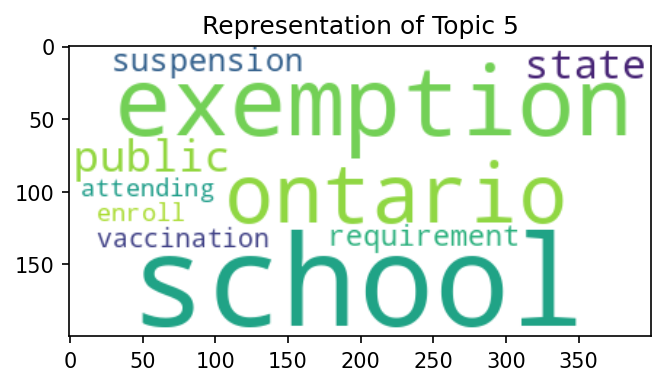

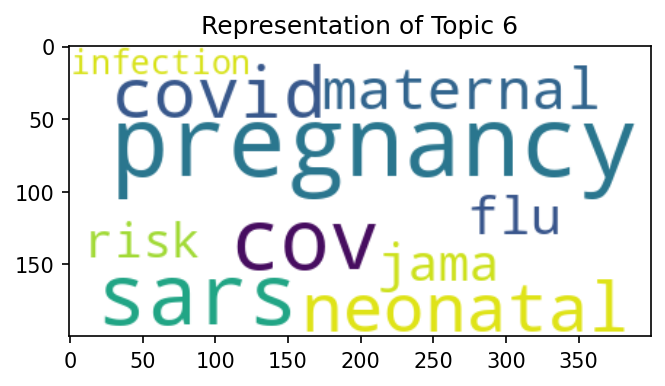

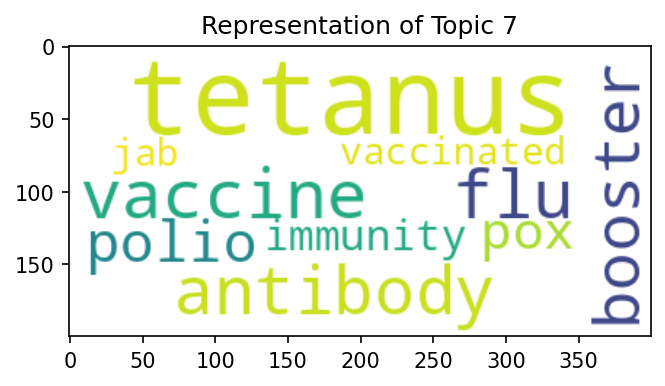

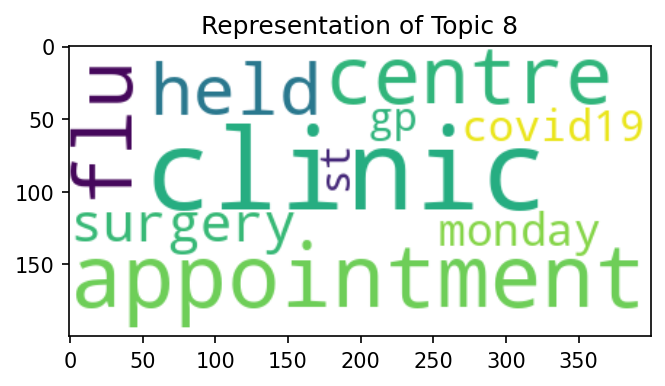

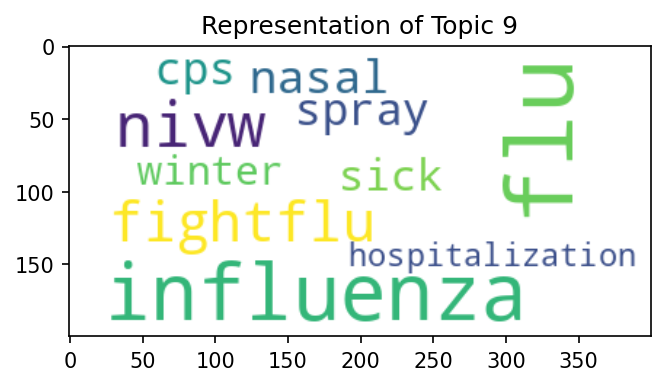

In [ ]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_heatmap(top_n_topics=10)

In [ ]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 108/108 [00:09<00:00, 11.51it/s]


In [ ]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [00:38,  1.91s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"vaccination, vaccinate, vaccine, flu, infant",401,2023-11-04 04:01:38.288999936+00:00
1,0,"sids, covid, vaccination, vaccinate, vaccine",207,2023-11-04 04:01:38.288999936+00:00
2,1,"measles, mmr, gisela, objected, roble",9,2023-11-04 04:01:38.288999936+00:00
3,3,"autism, amish, data, gentic, predisposition",14,2023-11-04 04:01:38.288999936+00:00
4,4,"rsv, pfizer, pregnant, respiratory, neonatal",7,2023-11-04 04:01:38.288999936+00:00
...,...,...,...,...
1235,103,"entrusting, elternhospi, souvenir, congratulat...",1,2024-02-13 21:38:36.449999872+00:00
1236,104,"diphtheria, padgham, uncle, died, grandmother",7,2024-02-13 21:38:36.449999872+00:00
1237,106,"event, ave, covidvaccine, calendar, visit",3,2024-02-13 21:38:36.449999872+00:00
1238,107,"miscarriage, shape, husband, luck, stillbirth",3,2024-02-13 21:38:36.449999872+00:00


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [ ]:

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)